In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
!ls "/content/drive/My Drive"

'Colab Notebooks'  'Fixed Resume.pdf'  'M.Tech DA'   Resume   Resume1.pdf


In [61]:
import pandas as pd
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/nursery.csv")
data

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [62]:
data.columns

Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'final evaluation'],
      dtype='object')

In [63]:
data["final evaluation"].unique()

array(['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'],
      dtype=object)

In [64]:
data['final evaluation'] = data['final evaluation'].replace({'spec_prior': 'recommend', 'very_recom': 'recommend'})
data

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,recommend
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,recommend
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,recommend


In [65]:
data["final evaluation"].unique()

array(['recommend', 'priority', 'not_recom'], dtype=object)

In [66]:
MEAN=[]
VARIANCE=[]

#Task 1:
Let’s consider the classification problem in https://archive.ics.uci.edu/dataset/76/nursery, which is a
8-features, 3-classes dataset. It is mentioned in the link that the expected performance of over 90%
accuracy (See Baseline Model Performance). Let’s add the following model performance outcomes
to the baselines, shall we?
1. Decision Tree (categorical features)
2. Decision Tree (categorical features in one-hot encoded form)
3. Logistic Regression with L1 regularization
4. k-Nearest Neighbors
You are expected to split the data into train, val & test. Use the val partition to tune the
hyperparameters such as (but not limited to) k of kNN, height of DT, or lambda of L1 reg. Remember,
there are several other hyper parameters.
Report the performance of the test-data. Create a similar visualization with 9 methods now, with
your additional 4 methods. The plot shows the mean and variance, FYI. Use a suitable visualization
method to get them. You may wonder; to compute variance, you need more than 2 samples.
Right. Repeat this task 5 times to get the mean and variance. :)

1. Decision Tree (categorical features)

In [67]:
df=data
df['parents'] = df['parents'].astype('category')
df['has_nurs'] = df['has_nurs'].astype('category')
df['form'] = df['form'].astype('category')
df['children'] = df['children'].astype('category')
df['housing'] = df['housing'].astype('category')
df['finance'] = df['finance'].astype('category')
df['social'] = df['social'].astype('category')
df['health'] = df['health'].astype('category')
df['final evaluation'] = df['final evaluation'].astype('category')

In [68]:
df=data
X=df.drop(columns="final evaluation")
y=df["final evaluation"]

In [69]:
X

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority
...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority


In [70]:
y

,final evaluation
0,recommend
1,priority
2,not_recom
3,recommend
4,priority
...,...
12955,recommend
12956,not_recom
12957,recommend
12958,recommend


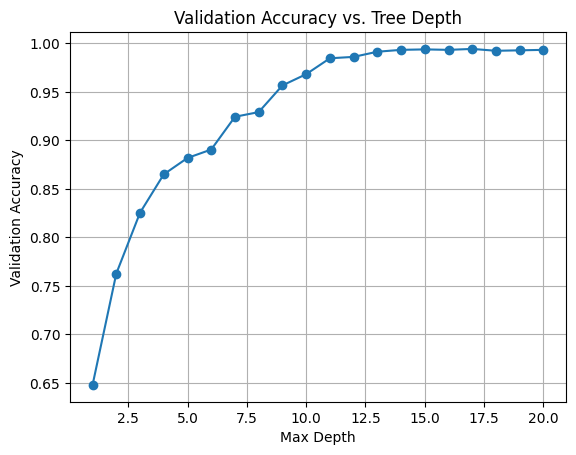


Best Max Depth: 17

Classification Report:
0.9926697530864198
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       0.98      1.00      0.99       852
           2       1.00      0.98      0.99       910

    accuracy                           0.99      2592
   macro avg       0.99      0.99      0.99      2592
weighted avg       0.99      0.99      0.99      2592



In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
y_encoded = label_encoder.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X_encoded,y_encoded,test_size=0.2,random_state=355)
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=355)

depths = range(1, 21)
validation_score = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
    model.fit(X_train, y_train)
    validation_predict = model.predict(X_validation)
    validation_score.append(accuracy_score(y_validation, validation_predict))

plt.plot(depths, validation_score, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Tree Depth")
plt.grid(True)
plt.show()


best_depth = depths[validation_score.index(max(validation_score))]
best_model = DecisionTreeClassifier(max_depth=best_depth, criterion="entropy", random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("\nBest Max Depth:", best_depth)
print("\nClassification Report:")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

MEAN.append(accuracy_score(y_test, y_pred))
VARIANCE.append(0.1)


2. Decision Tree (categorical features in one-hot encoded form)

In [72]:
df=data
X=df.drop(columns="final evaluation")
y=df["final evaluation"]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


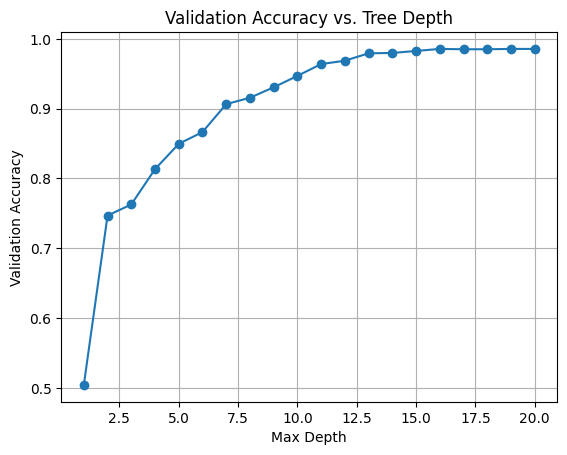


Best Max Depth: 16

Classification Report:
0.9822530864197531
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       0.96      0.98      0.97       852
           2       0.98      0.97      0.97       910

    accuracy                           0.98      2592
   macro avg       0.98      0.98      0.98      2592
weighted avg       0.98      0.98      0.98      2592


Accuracy Scores for each fold: [0.9822530864197531, 0.9965277777777778, 0.9972993827160493, 0.9972993827160493, 0.9969135802469136]
Mean Accuracy: 0.9940586419753087
Variance of Accuracy: 3.4924649443682365e-05


In [73]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
import numpy as np


encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
X = X_encoded_df
y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=355)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=355)

depths = range(1, 21)
validation_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, criterion="entropy", random_state=42)
    model.fit(X_train, y_train)
    validation_predict = model.predict(X_validation)
    validation_scores.append(accuracy_score(y_validation, validation_predict))

plt.plot(depths, validation_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Tree Depth")
plt.grid(True)
plt.show()

best_depth = depths[validation_scores.index(max(validation_scores))]
best_model = DecisionTreeClassifier(max_depth=best_depth, criterion="entropy", random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("\nBest Max Depth:", best_depth)
print("\nClassification Report:")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

kf = KFold(n_splits=5, shuffle=True, random_state=355)
accuracy_scores = []

for train_index, validation_index in kf.split(X):
    X_train_fold, X_validation_fold = X.iloc[train_index], X.iloc[validation_index]
    y_train_fold, y_validation_fold = y.iloc[train_index], y.iloc[validation_index]

    y_pred_fold = best_model.predict(X_validation_fold)
    accuracy = accuracy_score(y_validation_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)

print("\nAccuracy Scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)

MEAN.append(mean_accuracy)
VARIANCE.append(variance_accuracy)

 3. Logistic Regression with L1 regularization

In [74]:
df=data
X=df.drop(columns="final evaluation")
y=df["final evaluation"]

In [75]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

encoder=OneHotEncoder(sparse=False,drop='first')
X_encoded=encoder.fit_transform(X)
X=pd.DataFrame(X_encoded,columns=encoder.get_feature_names_out())

y=y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=355)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=355)

param_grid={
    'C':[0.01,0.1,1,10,100],
    'solver': ['liblinear', 'saga']
}

model=LogisticRegression(penalty='l1',random_state=355)

gridsearch=GridSearchCV(model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridsearch.fit(X_validation,y_validation)

print()
print("Best parameters",gridsearch.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



Best parameters {'C': 10, 'solver': 'liblinear'}


In [76]:
model=gridsearch.best_estimator_
model

LogisticRegression(C=10, penalty='l1', random_state=355, solver='liblinear')

In [77]:
y_predict=model.predict(X_test)
print("Accuracy Score:",accuracy_score(y_predict,y_test))
print("Classification report:",classification_report(y_predict,y_test))

Accuracy Score: 0.9185956790123457
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       0.88      0.87      0.88       861
           2       0.88      0.89      0.88       901

    accuracy                           0.92      2592
   macro avg       0.92      0.92      0.92      2592
weighted avg       0.92      0.92      0.92      2592



In [78]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=355)
accuracy_scores = []

for train_index, validation_index in kf.split(X):
    X_train_fold, X_validation_fold = X.iloc[train_index], X.iloc[validation_index]
    y_train_fold, y_validation_fold = y.iloc[train_index], y.iloc[validation_index]

    y_pred_fold = model.predict(X_validation_fold)
    accuracy = accuracy_score(y_validation_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)

print("\nAccuracy Scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)

MEAN.append(mean_accuracy)
VARIANCE.append(variance_accuracy)



Accuracy Scores for each fold: [0.9185956790123457, 0.9070216049382716, 0.9189814814814815, 0.9166666666666666, 0.9147376543209876]
Mean Accuracy: 0.9152006172839506
Variance of Accuracy: 1.9016251333638433e-05


4. k-Nearest Neighbors

In [79]:
df=data
X=df.drop(columns="final evaluation")
y=df["final evaluation"]

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

# onehot encoding
encoder=OneHotEncoder(sparse=False,drop='first')
X_encoded=encoder.fit_transform(X)
X=pd.DataFrame(X_encoded,columns=encoder.get_feature_names_out())

y=y.astype('category').cat.codes

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=355)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=355)

param_grid={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance']
}

knn=KNeighborsClassifier()
gridsearch=GridSearchCV(knn,param_grid,scoring='accuracy',n_jobs=-1)
gridsearch.fit(X_validation,y_validation)

print()
print("Best Parameters:",gridsearch.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Best Parameters: {'n_neighbors': 11, 'weights': 'distance'}


In [81]:
model=gridsearch.best_estimator_
model

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [82]:
y_predict=model.predict(X_test)
print("Accuracy Score:",accuracy_score(y_predict,y_test))
print("Classification report:",classification_report(y_predict,y_test))

Accuracy Score: 0.8603395061728395
Classification report:               precision    recall  f1-score   support

           0       0.96      0.95      0.96       842
           1       0.82      0.80      0.81       878
           2       0.80      0.84      0.82       872

    accuracy                           0.86      2592
   macro avg       0.86      0.86      0.86      2592
weighted avg       0.86      0.86      0.86      2592



In [83]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=355)
accuracy_scores = []

for train_index, validation_index in kf.split(X):
    X_train_fold, X_validation_fold = X.iloc[train_index], X.iloc[validation_index]
    y_train_fold, y_validation_fold = y.iloc[train_index], y.iloc[validation_index]

    y_pred_fold = model.predict(X_validation_fold)
    accuracy = accuracy_score(y_validation_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)

print("\nAccuracy Scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)

MEAN.append(mean_accuracy)
VARIANCE.append(variance_accuracy)


Accuracy Scores for each fold: [0.8603395061728395, 0.8811728395061729, 0.8915895061728395, 0.8931327160493827, 0.8846450617283951]
Mean Accuracy: 0.8821759259259258
Variance of Accuracy: 0.00013851975689681455


# Baseline Line Model

5. Logistic Regression

In [84]:
df=data
X=df.drop(columns="final evaluation")
y=df["final evaluation"]

In [85]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# onehot encoding
encoder=OneHotEncoder(sparse=False,drop='first')
X_encoded=encoder.fit_transform(X)
X=pd.DataFrame(X_encoded,columns=encoder.get_feature_names_out())

y=y.astype('category').cat.codes

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=355)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=355)

param_grid={
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

model=LogisticRegression(penalty='l2',random_state=355)

gridsearch=GridSearchCV(model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridsearch.fit(X_validation,y_validation)

print()
print("Best parameters",gridsearch.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Best parameters {'C': 10, 'solver': 'saga'}


In [86]:
model=gridsearch.best_estimator_
model

LogisticRegression(C=10, random_state=355, solver='saga')

In [87]:
y_predict=model.predict(X_test)
print("Accuracy Score:",accuracy_score(y_predict,y_test))
print("Classification report:",classification_report(y_predict,y_test))


Accuracy Score: 0.9185956790123457
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       0.88      0.87      0.88       861
           2       0.88      0.89      0.88       901

    accuracy                           0.92      2592
   macro avg       0.92      0.92      0.92      2592
weighted avg       0.92      0.92      0.92      2592



In [88]:
kf = KFold(n_splits=5, shuffle=True, random_state=355)
accuracy_scores = []

for train_index, validation_index in kf.split(X):
    X_train_fold, X_validation_fold = X.iloc[train_index], X.iloc[validation_index]
    y_train_fold, y_validation_fold = y.iloc[train_index], y.iloc[validation_index]

    y_pred_fold = model.predict(X_validation_fold)
    accuracy = accuracy_score(y_validation_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)

print("\nAccuracy Scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)

MEAN.append(mean_accuracy)
VARIANCE.append(variance_accuracy)


Accuracy Scores for each fold: [0.9185956790123457, 0.9070216049382716, 0.9185956790123457, 0.9166666666666666, 0.9147376543209876]
Mean Accuracy: 0.9151234567901234
Variance of Accuracy: 1.845659960371925e-05


6. Neural Network Classification

In [89]:
df=data
X=df.drop(columns="final evaluation")
y=df["final evaluation"]

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

encoder=OneHotEncoder(sparse=False,drop='first')
X_encoded=encoder.fit_transform(X)
X=pd.DataFrame(X_encoded,columns=encoder.get_feature_names_out())

y=y.astype('category').cat.codes

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=355)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=355)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

acc=accuracy * 100
MEAN.append(acc)
VARIANCE.append(0.1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
208/208 - 3s - 13ms/step - accuracy: 0.5797 - loss: 0.9064 - val_accuracy: 0.7239 - val_loss: 0.7135
Epoch 2/100
208/208 - 1s - 4ms/step - accuracy: 0.8309 - loss: 0.5130 - val_accuracy: 0.8855 - val_loss: 0.3668
Epoch 3/100
208/208 - 1s - 4ms/step - accuracy: 0.9014 - loss: 0.3125 - val_accuracy: 0.9066 - val_loss: 0.2894
Epoch 4/100
208/208 - 1s - 4ms/step - accuracy: 0.9188 - loss: 0.2544 - val_accuracy: 0.9253 - val_loss: 0.2418
Epoch 5/100
208/208 - 1s - 2ms/step - accuracy: 0.9314 - loss: 0.2154 - val_accuracy: 0.9343 - val_loss: 0.2091
Epoch 6/100
208/208 - 1s - 3ms/step - accuracy: 0.9408 - loss: 0.1889 - val_accuracy: 0.9476 - val_loss: 0.1818
Epoch 7/100
208/208 - 1s - 3ms/step - accuracy: 0.9460 - loss: 0.1689 - val_accuracy: 0.9548 - val_loss: 0.1635
Epoch 8/100
208/208 - 0s - 2ms/step - accuracy: 0.9509 - loss: 0.1514 - val_accuracy: 0.9566 - val_loss: 0.1482
Epoch 9/100
208/208 - 1s - 3ms/step - accuracy: 0.9563 - loss: 0.1356 - val_accuracy: 0.9608 - val_loss

7. Random Forest Classification

In [91]:
df=data
X=df.drop(columns="final evaluation")
y=df["final evaluation"]

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score

encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
X = X_encoded_df

y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=355)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=355)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    }

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred,y_test))


kf = KFold(n_splits=5, shuffle=True, random_state=355)
accuracy_scores = []

for train_index, validation_index in kf.split(X):
    X_train_fold, X_validation_fold = X.iloc[train_index], X.iloc[validation_index]
    y_train_fold, y_validation_fold = y.iloc[train_index], y.iloc[validation_index]

    y_pred_fold = best_model.predict(X_validation_fold)
    accuracy = accuracy_score(y_validation_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)

print("\nAccuracy Scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)

MEAN.append(mean_accuracy)
VARIANCE.append(variance_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       0.94      0.97      0.95       852
           2       0.97      0.94      0.95       910

    accuracy                           0.97      2592
   macro avg       0.97      0.97      0.97      2592
weighted avg       0.97      0.97      0.97      2592

0.9683641975308642

Accuracy Scores for each fold: [0.9683641975308642, 0.9965277777777778, 0.9972993827160493, 0.9965277777777778, 0.9953703703703703]
Mean Accuracy: 0.9908179012345679
Variance of Accuracy: 0.00012642175354366682


8. Support Vector Classification

In [93]:
df=data
X=df.drop(columns="final evaluation")
y=df["final evaluation"]

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score
from sklearn.svm import SVC

encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
X = X_encoded_df

y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=355)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=355)

param_grid = {
'C': [0.1, 1, 10, 100],
    'kernel': ['linear',  'sigmoid'],
    'degree': [3, 4, 5],
    }

model = SVC(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score",accuracy_score(y_pred,y_test))


kf = KFold(n_splits=5, shuffle=True, random_state=355)
accuracy_scores = []

for train_index, validation_index in kf.split(X):
    X_train_fold, X_validation_fold = X.iloc[train_index], X.iloc[validation_index]
    y_train_fold, y_validation_fold = y.iloc[train_index], y.iloc[validation_index]

    y_pred_fold = best_model.predict(X_validation_fold)
    accuracy = accuracy_score(y_validation_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)

print("\nAccuracy Scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)
MEAN.append(mean_accuracy)
VARIANCE.append(variance_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters: {'C': 100, 'degree': 3, 'kernel': 'linear'}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       0.85      0.90      0.87       852
           2       0.90      0.85      0.87       910

    accuracy                           0.91      2592
   macro avg       0.92      0.92      0.92      2592
weighted avg       0.92      0.91      0.91      2592

Accuracy Score 0.9143518518518519

Accuracy Scores for each fold: [0.9143518518518519, 0.910108024691358, 0.9251543209876543, 0.9216820987654321, 0.9158950617283951]
Mean Accuracy: 0.9174382716049381
Variance of Accuracy: 2.8637498094802475e-05


9. Xgboost Classification

In [95]:
df=data
X=df.drop(columns="final evaluation")
y=df["final evaluation"]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       0.99      1.00      1.00       852
           2       1.00      0.99      1.00       910

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592

Accuracy Score: 0.9969135802469136

Accuracy Scores for each fold: [0.9969135802469136, 0.9996141975308642, 1.0, 1.0, 0.9992283950617284]
Mean Accuracy: 0.9991512345679012
Variance of Accuracy: 1.3336381649139038e-06


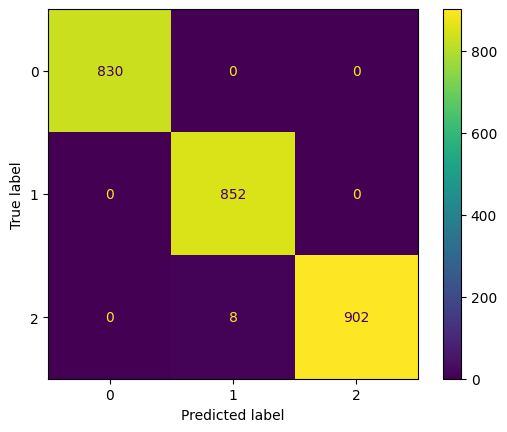

In [96]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
X = X_encoded_df

y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=355)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=355)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'reg_lambda': [1, 10, 100]
}

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:",accuracy_score(y_pred,y_test))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)



kf = KFold(n_splits=5, shuffle=True, random_state=355)
accuracy_scores = []

for train_index, validation_index in kf.split(X):
    X_train_fold, X_validation_fold = X.iloc[train_index], X.iloc[validation_index]
    y_train_fold, y_validation_fold = y.iloc[train_index], y.iloc[validation_index]

    y_pred_fold = best_model.predict(X_validation_fold)
    accuracy = accuracy_score(y_validation_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)

print("\nAccuracy Scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)

MEAN.append(mean_accuracy)
VARIANCE.append(variance_accuracy)

# Mean Variance vs Classification Model

In [131]:
mean_scores=[]
for i in MEAN:
  if i<1:
    mean_scores.append(i*100)
  else:
    mean_scores.append(i)

std_devs = np.round(VARIANCE, 4)
mean_scores=np.round(mean_scores,2)

mean_scores

array([99.27, 99.41, 91.52, 88.22, 91.51, 99.88, 99.08, 91.74, 99.92])

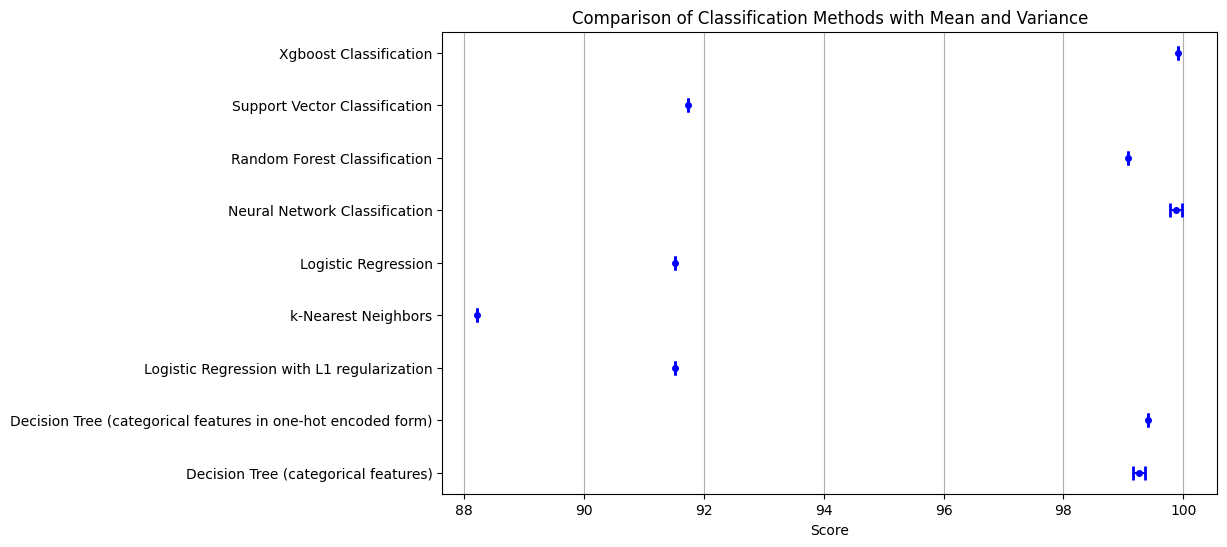

In [133]:
import matplotlib.pyplot as plt
import numpy as np
methods = ['Decision Tree (categorical features)','Decision Tree (categorical features in one-hot encoded form)','Logistic Regression with L1 regularization','k-Nearest Neighbors','Logistic Regression', 'Neural Network Classification', 'Random Forest Classification',
           'Support Vector Classification', 'Xgboost Classification']

y_pos = np.arange(len(methods))
plt.figure(figsize=(10, 6))
plt.errorbar(mean_scores, y_pos, xerr=std_devs, fmt='.', capsize=5, capthick=2, markersize=8, color='blue')

plt.yticks(y_pos, methods)
plt.xlabel('Score')
plt.title('Comparison of Classification Methods with Mean and Variance')
plt.grid(True, axis='x')
plt.show()


# Task 2:
You may notice that the shape of logistic regression decision boundary and a sigmoid are a look-alike.
We know that range of sigmoid is 0 to 1, which means, we can use sigmoid only when outputs are
unipolar. Here are some simple extensions, we may try.
1. Construct a bipolar_sigmoid(x) using unipolar sigmoid.
2. A popular bipolar normalizer is tanh(x). Compare the reponse of tanh(x) vs your
bipolar_sigmoid(x).
3. Parameterize it as bipolar_sigmoid(ax), tanh(ax); You may plot the shapes of the response at
different values of ‘a’ in [-5, -1, -.1, -.01, .001, .01, .1, 1, 5].
4. Now comes the interesting part. Can you evaluate the linear range of ‘x’ for each value of ‘a’ in
bipolar_sigmoid(ax)? Usually, when ‘a’ is small, the linearity range is high

1. Construct a bipolar_sigmoid(x) using unipolar sigmoid.

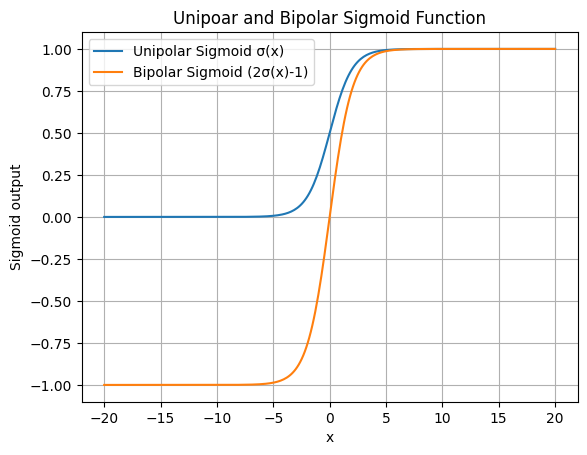

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def unipolar_sigmoid(x):
  return 1/(1+np.exp(-x))

def bipolar_sigmoid(x):
  return 2*unipolar_sigmoid(x)-1

x=np.linspace(-20,20,300)

unipolar=unipolar_sigmoid(x)
bipolar=bipolar_sigmoid(x)

plt.plot(x,unipolar,label="Unipolar Sigmoid σ(x)")

plt.plot(x,bipolar,label="Bipolar Sigmoid (2σ(x)-1)")
plt.title("Unipoar and Bipolar Sigmoid Function")
plt.xlabel('x')
plt.ylabel('Sigmoid output')
plt.grid()
plt.legend()
plt.show()


2. A popular bipolar normalizer is tanh(x). Compare the reponse of tanh(x) vs your
bipolar_sigmoid(x).

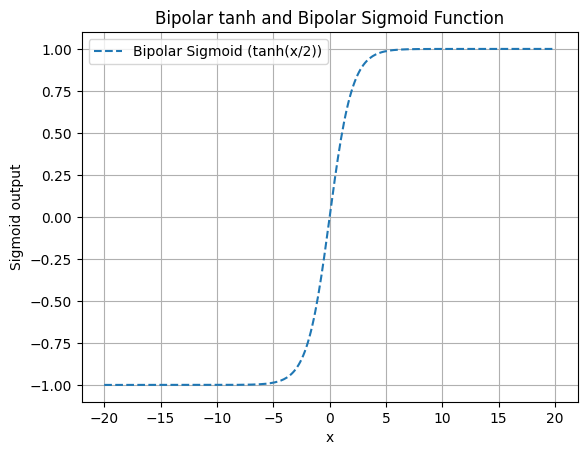

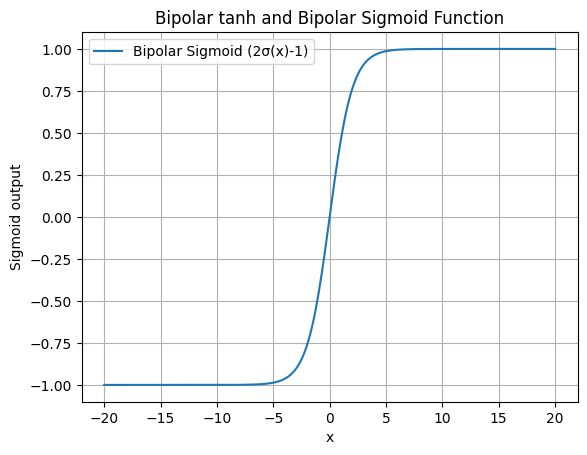

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def unipolar_sigmoid(x):
  return 1/(1+np.exp(-x))

def bipolar_sigmoid(x):
  return 2*unipolar_sigmoid(x)-1

def bipolar_tanh(x):
  return np.tanh(x/2)

x=np.linspace(-20,20,300)
tanh=bipolar_tanh(x)
bipolar=bipolar_sigmoid(x)

plt.plot(x,tanh,label="Bipolar Sigmoid (tanh(x/2))",linestyle="--")
plt.title("Bipolar tanh and Bipolar Sigmoid Function")
plt.xlabel('x')
plt.ylabel('Sigmoid output')
plt.grid()
plt.legend()
plt.show()

plt.plot(x,bipolar,label="Bipolar Sigmoid (2σ(x)-1)")
plt.title("Bipolar tanh and Bipolar Sigmoid Function")
plt.xlabel('x')
plt.ylabel('Sigmoid output')
plt.grid()
plt.legend()
plt.show()


3. Parameterize it as bipolar_sigmoid(ax), tanh(ax); You may plot the shapes of the response at
different values of ‘a’ in [-5, -1, -.1, -.01, .001, .01, .1, 1, 5].

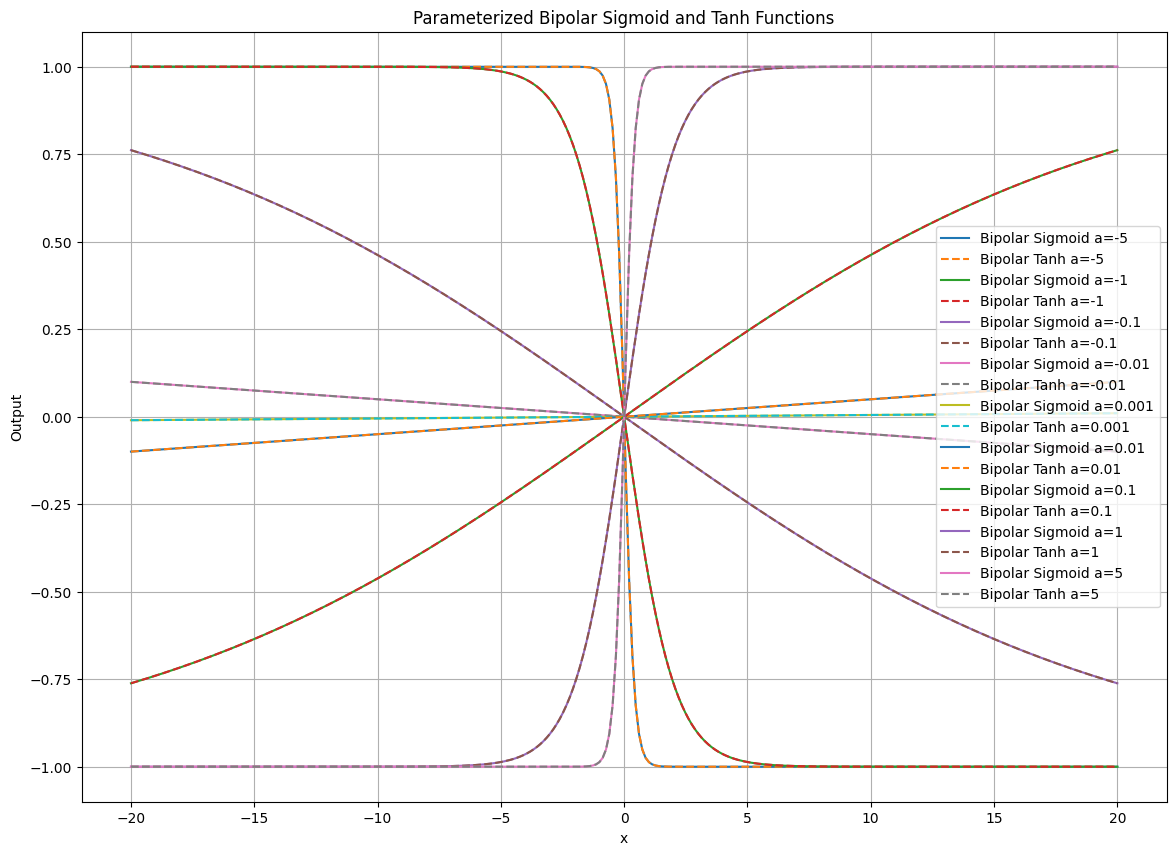

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def unipolar_sigmoid(x):
  return 1/(1+np.exp(-x))

def bipolar_sigmoid(x):
  return 2*unipolar_sigmoid(x)-1

def bipolar_tanh(x):
  return np.tanh(x/2)

a=[-5,-1,-0.1,-0.01,0.001,0.01,0.1,1,5]
x=np.linspace(-20,20,300)

plt.figure(figsize=(14, 10))
for it in a:
    bipolar_sig = bipolar_sigmoid(x*it)
    bipolar_sig_tanh = bipolar_tanh(x*it)

    plt.plot(x, bipolar_sig, label=f"Bipolar Sigmoid a={it}")
    plt.plot(x, bipolar_sig_tanh, '--', label=f"Bipolar Tanh a={it} ")


plt.xlabel("x")
plt.ylabel("Output")
plt.title("Parameterized Bipolar Sigmoid and Tanh Functions")
plt.legend()
plt.grid(True)
plt.show()

Observation: For small values of a , sigmoid bipolar is near about a straight line.

4. Now comes the interesting part. Can you evaluate the linear range of ‘x’ for each value of ‘a’ in
bipolar_sigmoid(ax)? Usually, when ‘a’ is small, the linearity range is high

<ipython-input-102-00c7619a6867>:8: RuntimeWarning: overflow encountered in square
  return 2 * a * np.exp(-a * z) / (1 + np.exp(-a * z))**2


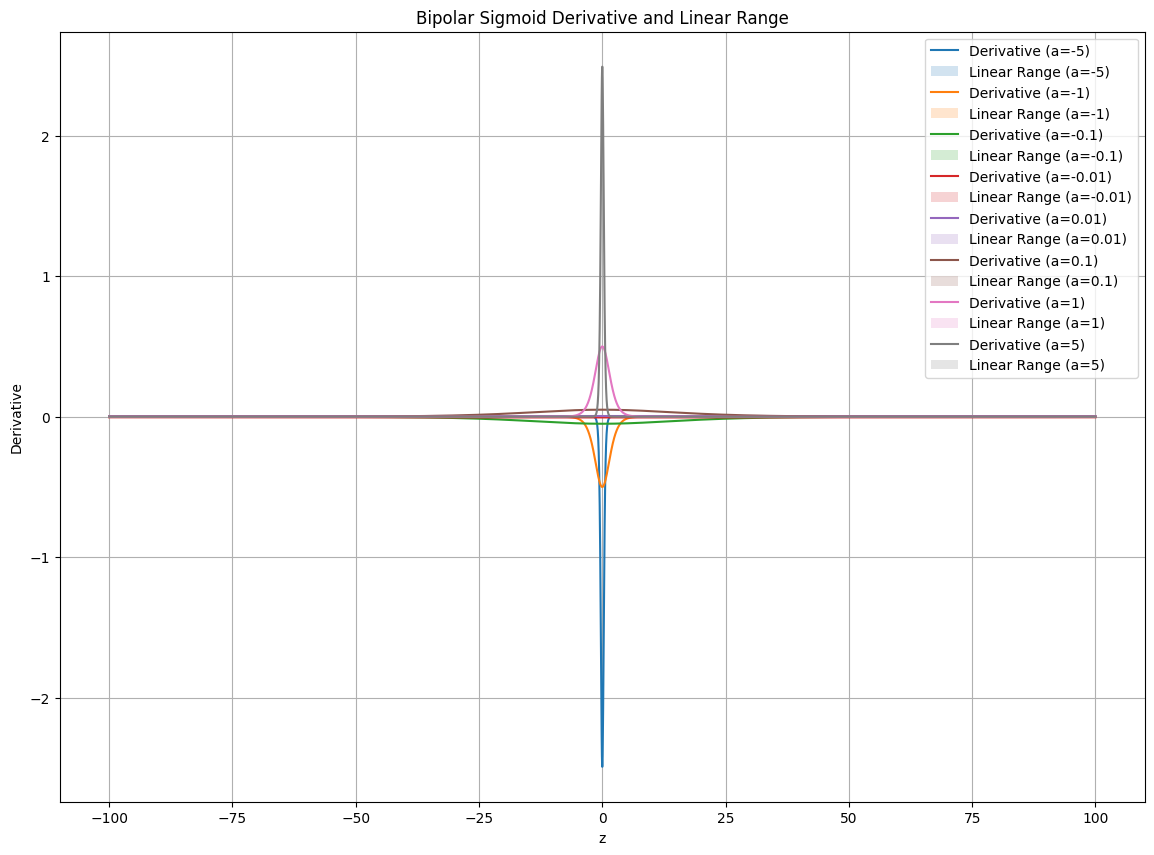

In [102]:
import numpy as np
import matplotlib.pyplot as plt

def bipolar_sigmoid(z, a):
    return 2 / (1 + np.exp(-a * z)) - 1

def bipolar_sigmoid_derivative(z, a):
    return 2 * a * np.exp(-a * z) / (1 + np.exp(-a * z))**2

z = np.linspace(-100, 100, 4000)
a_values = [-5, -1, -0.1, -0.01, 0.01, 0.1, 1, 5]

plt.figure(figsize=(14, 10))
for a in a_values:
    derivative = bipolar_sigmoid_derivative(z, a)
    linear_range = z[(derivative > 0.9 * a) & (derivative < 1.1 * a)]

    plt.plot(z, derivative, label=f"Derivative (a={a})")
    plt.fill_between(linear_range, 0, 1, alpha=0.2, label=f"Linear Range (a={a})")

plt.xlabel("z")
plt.ylabel("Derivative")
plt.title("Bipolar Sigmoid Derivative and Linear Range")
plt.legend()
plt.grid(True)
plt.show()
